# LightGBM

## LightGBM 장단점

- XGB보다도 학습에 걸리는 시간이 훨씬 적으며 메모리 사용량도 상대적으로 적다
- 카테고리형 피처를 자동 변환하고, 예측 성능 역시 XGB와 큰 차이가 없다.
- 데이터의 갯수가 적을 경우 과적합이 발생하기 쉽다.
- 적은 데이터의 갯수에 대한 기준은 애매하지만 LightGBM의 공식문서에서 10,000건 이하라고 기술하였다.

## 트리 기반 알고리즘 특징

- 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용한다.
- 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 깊이가 최소화되며 과대적합에 보다 강한 구조를 가진다.
- 하지만 균형을 맞추기 위한 시간이 오래 걸리는 단점이 있다.

## LightGBM 특징

- LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다.
- 트리의 균형을 맞추지 않고 최대 손실값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하여 깊이가 증가하고 비대칭적인 트리를 생성한다.
- 이렇게 생성된 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM의 구현 사상이다

# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

# 데이터 로딩과 훈련세트와 테스트세트분리

In [3]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(True)

# X = cancer.data
# y = cancer.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

evals = [(X_test, y_test)]

# 학습
lgbm = LGBMClassifier(n_estimators = 4000)
lgbm.fit(X_train, y_train, early_stopping_rounds = 100, 
         eval_metric = 'logloss', eval_set = evals, verbose=True)

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimators=4000)

## 예측과 평가

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

pred = lgbm.predict(X_test)

In [6]:
# 정확도
accuracy_score(y_test, pred)

0.956140350877193

In [7]:
# 정밀도
precision = precision_score(y_test, pred)
precision

0.95

In [8]:
# 재현율
recall = recall_score(y_test, pred)
recall

0.987012987012987

In [10]:
# F1 score
f1 = f1_score(y_test, pred)
f1

0.9681528662420381

In [15]:
preds = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:, 1]

In [13]:
# 혼돈 행렬
confusion = confusion_matrix(y_test, pred)
confusion

array([[33,  4],
       [ 1, 76]], dtype=int64)

In [16]:
# auc 면적
auc = roc_auc_score(y_test, pred_proba)
auc

0.9905229905229904

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

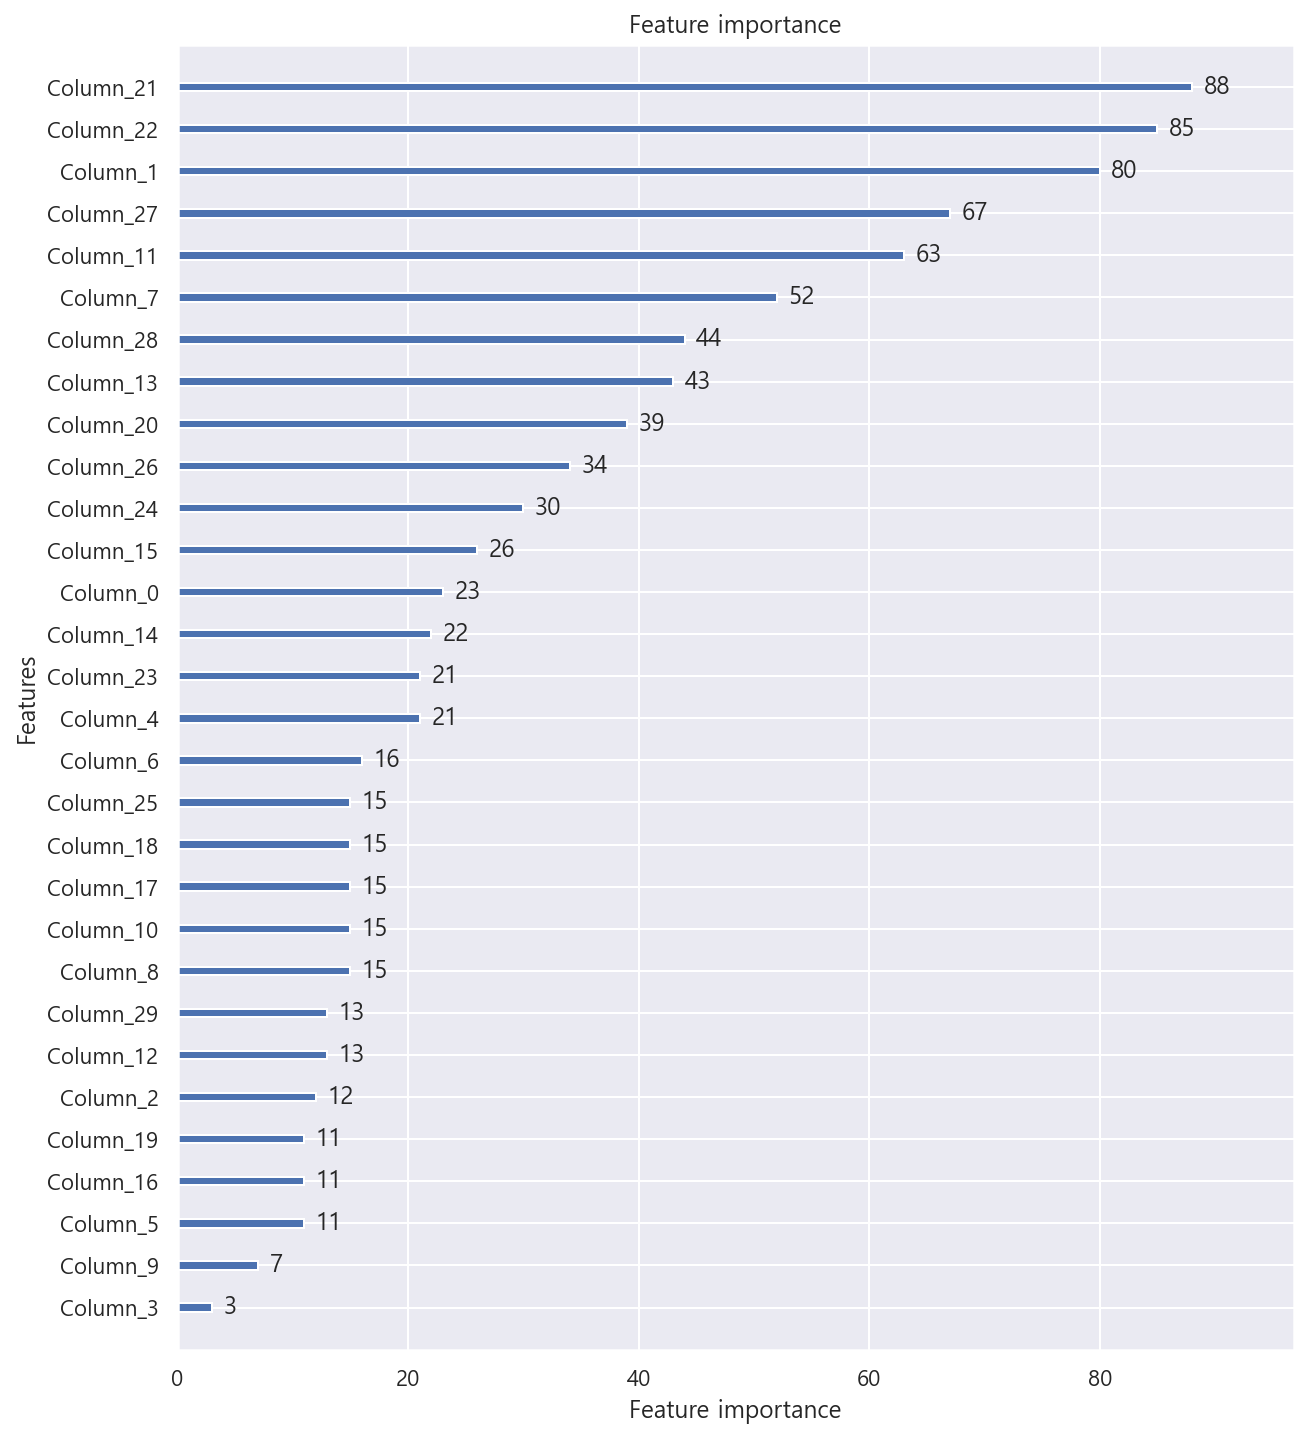

In [17]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm, ax=ax)

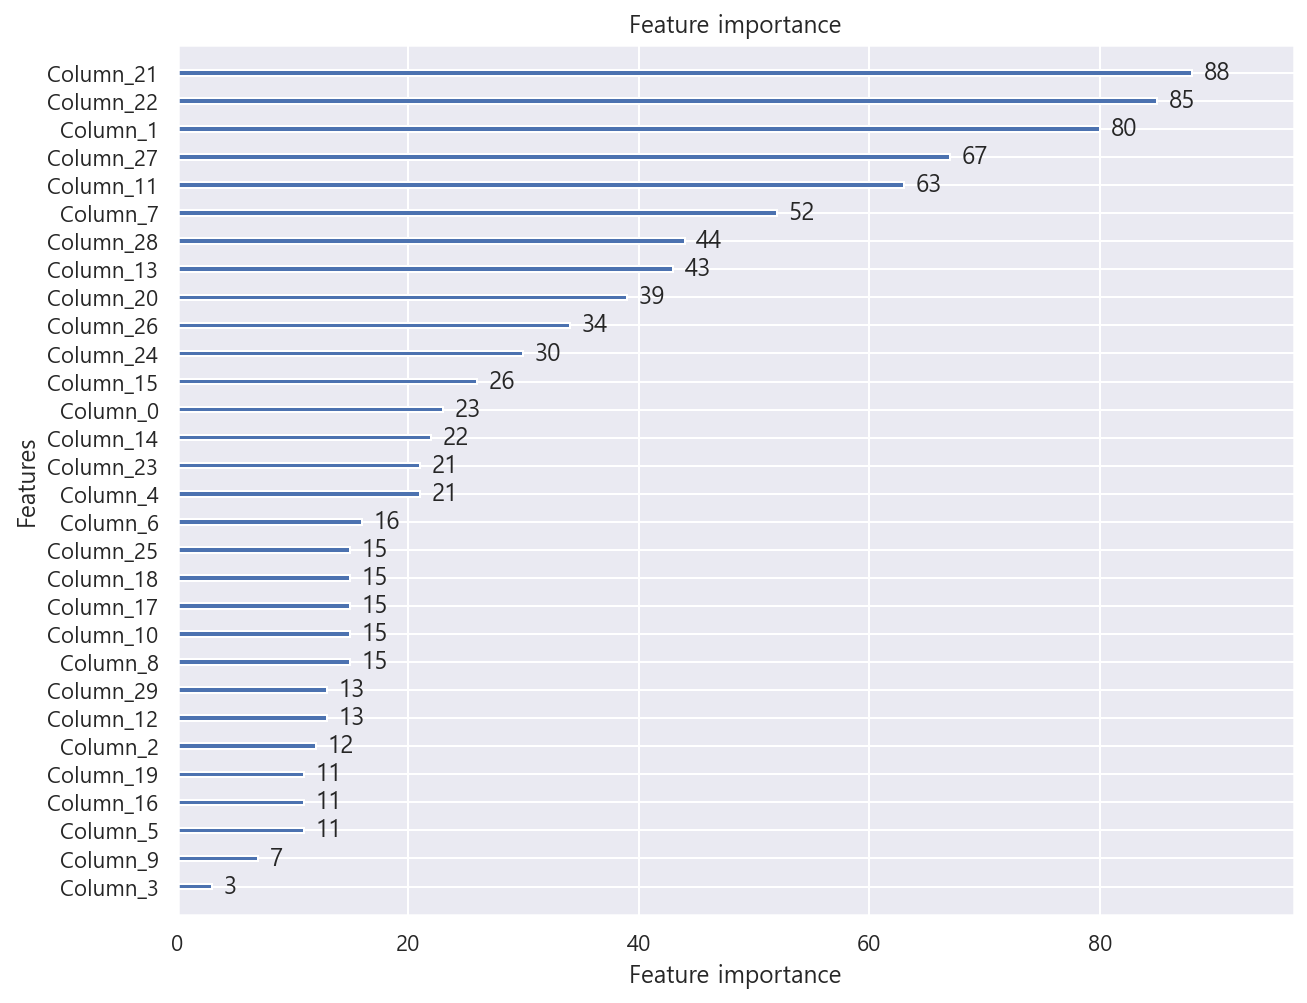

In [18]:
plot_importance(lgbm)
plt.show()